In [1]:
# Se cargan las librerías que se van a utilizar en ambos ejemplos
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import PolynomialFeatures  # <------ library to perform Polynomial Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

pd.set_option('display.max_rows', 90) # by default is 10, if change to None print ALL
pd.set_option('display.max_columns', 90) # by default is 10, if change to None print ALL

In [2]:
## 1) EXTRAER DATOS
# Los datos pueden encontrarse en diferentes formatos, en nuestro caso están en formato csv.

# Se carga la base de datos
train = pd.read_csv('train.csv') #Se encuentra en la misma carpeta que el jupyter notebook
test = pd.read_csv('test.csv') #Se encuentra en la misma carpeta que el jupyter notebook
print(train.shape) 
print(test.shape) 
train

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Eliminate of some columns 

Veamos a eleminar las columnas que tienen más del 50% de sus valores como nulas en train

In [3]:
col_plus_50percent_null = train.isnull().sum()[train.isnull().sum()>train.shape[0]/2]
col_plus_50percent_null

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Observemos que también hay casi las mismas columnas en test 

In [4]:
test.isnull().sum()[test.isnull().sum()>test.shape[0]/2]

Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

Entonces nos queda 

In [5]:
features_drop = ['PoolQC','MiscFeature','Alley','Fence']
train = train.drop(features_drop, axis=1)
test  =  test.drop(features_drop, axis=1)  

Comprovemos que ya no tenemos esas variables

In [6]:
col_plus_50percent_null = train.isnull().sum()[train.isnull().sum()>train.shape[0]/2]
col_plus_50percent_null

Series([], dtype: int64)

In [7]:
test.isnull().sum()[test.isnull().sum()>test.shape[0]/2]

FireplaceQu    730
dtype: int64

# Separación de variables

Separemos las variables en `X_train`, `X_test`, `y_train`, `y_test`, al igual que elijamos que columnas son numericas, ordinales y nominales

In [8]:

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

# ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
#           "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
#           "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

X_REAL_test = test[nominal + ordinal + numerical]

# Pipelines auxiliares

Para separar mejor el procesamiento de nuestros datos, utilizamos tres pipelines auxiliares

In [11]:
# Pipeline datos ordinales
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

# Pipeline datos nominales
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

# Pipeline datos numéricos
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pegado de los tres pipelines
preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])


Finalmente agregamos todo en un solo pipeline

In [12]:
# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)

# ML_model = Lasso(alpha=190)
# ML_model = Ridge(alpha=20)
ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])

In [13]:
complete_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseS...
                                                   'YearR

# Predicciones

ERRORS OF PREDICTIONS
MAE: 18487.88803988523
MSE: 884774787.0441939
RMSE: 29745.164095096094
r2_score: 0.8846496533334975


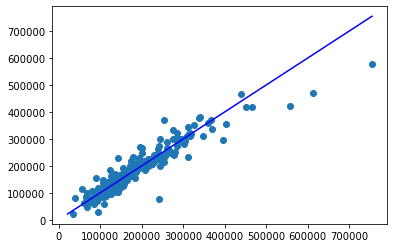

In [14]:
complete_pipeline.fit(X_train, y_train)
y_pred = complete_pipeline.predict(X_test)

print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score:', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)

# Generación de archivo para Kaggle

In [16]:
y_REAL_test = complete_pipeline.predict(X_REAL_test)

pred=pd.DataFrame(y_REAL_test)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

Para subir el archivo es [aquí](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation)

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []


X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


ML_model = Lasso(alpha=1)
ML_model = Ridge(alpha=.1)
# ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
#     ("scaler", StandardScaler()), # No mejora la estimación escalando
#     ('poly_features', PolynomialFeatures(degree=2)), # empeora con polynomal features
    ("estimator", ML_model)
])


complete_pipeline.fit(X_train, y_train)

y_pred = complete_pipeline.predict(X_test)

print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)


# ALL IN ONE

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 

numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove('Id')
numerical.remove('SalePrice')

nominal = train.select_dtypes(exclude=np.number).columns.tolist()

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

ordinal = []


X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


ML_model = Lasso(alpha=190)
ML_model = LinearRegression()

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
#     ("scaler", StandardScaler()), # No mejora la estimación escalando
#     ('poly_features', PolynomialFeatures(degree=2)),
    ("estimator", LinearRegression())
])


complete_pipeline.fit(X_train, y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.scatter(y_test,y_pred)


In [ ]:
aux = ct.fit_transform(X)
aux = pd.df(aux)

In [ ]:

preprocessed_features = preprocessing_pipeline.fit_transform(X_train)
preprocessed_features

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

# Encontrando alpha de Lasso (alpha = 180)

In [ ]:
parameters={'alpha':[100,150,170,180,190,200,220,250,300]}
ML_model=Lasso()
grid = GridSearchCV(ML_model,parameters,scoring='neg_mean_squared_error',cv=5)
grid.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
# Convert the results of CV into a dataframe
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

# Encontrando alpha de Ridge (alpha = 20)

In [ ]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300]}
ML_model=Ridge()
grid = GridSearchCV(ML_model,parameters,scoring='neg_mean_squared_error',cv=5)
grid.fit(preprocessing_pipeline.fit_transform(X_train),y_train)
# Convert the results of CV into a dataframe
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score')

## Numeric missing values 

# One Hot Encoder

In [ ]:
model

In [ ]:
# https://salvatore-raieli.medium.com/a-complete-guide-to-linear-regression-using-gene-expression-data-regularization-f980ba6b11f7


model = Lasso(alpha = 180)
model.fit(preprocessing_pipeline.fit_transform(X_train), y_train)

y_pred = complete_pipeline.predict(X_test)


coefs = model.coef_.flatten()
names = X_train.columns
genes = list(zip(names, coefs))
feature =pd.DataFrame(genes, columns = ["genes", "coefs"])
feature0 = feature.loc[(feature!=0).any(axis=1)]
feature0 = feature[(feature != 0).all(1)]
feature0.shape, feature.shape


print(feature0.shape, feature.shape)

coefs =feature0.sort_values(by=['coefs'])
plt.figure(figsize=(20, 15))
g = sns.barplot(x="genes", y="coefs", data=coefs, color= "lightblue")
g.figsize=(16,10)
plt.xticks(rotation=45)

In [ ]:
feature0

In [ ]:
# FUNCIONA LASSO

X = train[['MSSubClass', 'LotArea', 'OverallQual']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
y_pred= model_lasso.predict(X_test)


print('Predictions with Polynomial Regression')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


In [ ]:
# LASSO PIPELINE FUNCIONA

X = train[['MSSubClass','LotArea','OverallQual','LotFrontage']]#LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

imp_mean = SimpleImputer(missing_values =np.nan, strategy='mean')

columns_imp_mean = ['LotFrontage']

scaler = StandardScaler()

column_trans = make_column_transformer(
    (imp_mean,columns_imp_mean),
    remainder = 'passthrough')


ML_model = Lasso(alpha=0.01)

pipe = make_pipeline(column_trans, ML_model)

print(cross_val_score(pipe,X_train,y_train,cv=5))
pipe.fit(X_train,y_train)


y_pred= pipe.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)

In [ ]:
# primero hace la división de cross-validation y después hace el pipeline, 
# La diferencia de hacerlo así es que entonces cuando toma promedios para calcular como llenar los missing values, 
# estos promedios son con respecto al cross-validation
cross_val_score(pipe,X,y,cv=5,scoring='accuracy').mean() 

In [ ]:
# FUNCIONA PIPELINE LASSO WITH 
nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("scaler", StandardScaler()), # No mejora la estimación escalando
    ("estimator", LinearRegression())
])

complete_pipeline.fit(X_train, y_train)

y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


In [ ]:
# FUNCIONA PIPELINE LASSO WITH 
nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

X = train[nominal + ordinal + numerical] #LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


from sklearn.linear_model import LinearRegression

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LinearRegression())
])

complete_pipeline.fit(X_train, y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)


*A general rule of thumb: drop a dummy-encoded column if using a linear-based model, and do not drop it if using a tree-based model*

In [ ]:
true_value = y_test
predicted_value = y_pred

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The next cell is from [here](https://mahmoudyusof.github.io/general/scikit-learn-pipelines/)

In [ ]:
# The next cell is from https://mahmoudyusof.github.io/general/scikit-learn-pipelines/


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## let's create a validation set from the training set

msk = np.random.rand(len(train_df)) < 0.8

val_df = train_df[~msk]

train_df = train_df[msk]


nominal = ["MSZoning", "LotShape", "LandContour", "LotConfig", "Neighborhood",
           "Condition1", "BldgType", "RoofStyle",
           "Foundation", "CentralAir", "SaleType", "SaleCondition"]

ordinal = ["LandSlope", "OverallQual", "OverallCond", "YearRemodAdd",
          "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
          "KitchenQual", "Functional", "GarageCond", "PavedDrive"]

numerical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea",
            "OpenPorchSF"]

train_features = train_df[nominal + ordinal + numerical]
train_label = train_df["SalePrice"]

val_features = val_df[nominal + ordinal + numerical]
val_label = val_df["SalePrice"]

test_features = test_df[nominal + ordinal + numerical]


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


from sklearn.compose import ColumnTransformer

# here we are going to instantiate a ColumnTransformer object with a list of tuples
# each of which has a the name of the preprocessor
# the transformation pipeline (could be a transformer)
# and the list of column names we wish to transform

preprocessing_pipeline = ColumnTransformer([
    ("nominal_preprocessor", nominal_pipeline, nominal),
    ("ordinal_preprocessor", ordinal_pipeline, ordinal),
    ("numerical_preprocessor", numerical_pipeline, numerical)
])

## If you want to test this pipeline run the following code

# preprocessed_features = preprocessing_pipeline.fit_transform(train_features)


from sklearn.linear_model import LinearRegression

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LinearRegression())
])


complete_pipeline.fit(train_features, train_label)






# score = complete_pipeline.score(val_features, val_label)

# print(score)

# predictions = complete_pipeline.predict(test_features)





In [ ]:
# pipe = make_pipeline(column_trans, ML_model)

# print(cross_val_score(complete_pipeline,X_train,y_train,cv=5))
# pipe.fit(X_train,y_train)


y_pred = complete_pipeline.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)

In [ ]:
# LASSO PIPELINE FUNCIONA

X = train[['MSSubClass','LotArea','OverallQual','LotFrontage']]#LotFrontage y MasVnrType tiene NaNs
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

imp_mean = SimpleImputer(missing_values =np.nan, strategy='mean')

columns_imp_mean = ['LotFrontage']

scaler = StandardScaler()

column_trans = make_column_transformer(
    (imp_mean,columns_imp_mean),
    remainder = 'passthrough')


ML_model = Lasso(alpha=0.01)

pipe = make_pipeline(column_trans, ML_model)

print(cross_val_score(pipe,X_train,y_train,cv=5))
pipe.fit(X_train,y_train)


y_pred= pipe.predict(X_test)


print('ERRORS OF PREDICTIONS')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('r2_score', r2_score(y_test, y_pred)) 
plt.scatter(y_test,y_pred)
